# Situacion Problema

* Lo primero que haremos es importar e instalar las bibliotecas que haran falta para poder
  responder las preguntas que se haran posteriormente

In [2]:
pip install statsmodels

     |████████████████████████████████| 9.8 MB 4.9 MB/s            
     |████████████████████████████████| 233 kB 60.3 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

     |████████████████████████████████| 292 kB 4.7 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sklearn 

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 23.2 MB 4.7 MB/s            ██████████████▏                | 11.0 MB 4.7 MB/s eta 0:00:03
     |████████████████████████████████| 306 kB 57.9 MB/s            
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=942f3aa5589515f5c61185524e060659562a59d1edc54467b202b36f4bd886da
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [107]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 

* Ahora se procedera a bucar la base de datos dento de los archivos de Github

In [6]:
%ls SP/

COVID-19_Vaccinations_in_the_United_States_County.csv


* Se leera la base de datos

In [7]:
df = pd.read_csv('SP/COVID-19_Vaccinations_in_the_United_States_County.csv') 
df.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,...,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,11/30/21,6077.0,48.0,San Joaquin County,CA,55.7,424244.0,423613.0,67.4,390835.0,...,D,16.0,16.0,16.0,16.0,Metro,4.0,4.0,4.0,4.0
1,11/30/21,26013.0,48.0,Baraga County,MI,56.6,4650.0,4649.0,63.3,4533.0,...,C,12.0,12.0,12.0,12.0,Non-metro,8.0,8.0,8.0,8.0
2,11/30/21,16071.0,48.0,Oneida County,ID,38.0,1722.0,NaN,NaN,1716.0,...,B,6.0,7.0,8.0,8.0,Non-metro,6.0,7.0,8.0,8.0
3,11/30/21,38001.0,48.0,Adams County,ND,45.8,1014.0,1014.0,52.4,985.0,...,A,3.0,4.0,4.0,4.0,Non-metro,7.0,8.0,8.0,8.0
4,11/30/21,20071.0,48.0,Greeley County,KS,48.5,598.0,598.0,59.5,571.0,...,C,11.0,12.0,12.0,12.0,Non-metro,7.0,8.0,8.0,8.0


* Para poder crear las preguntas se hara un listado de los datos que tiene esta base de datos

In [8]:
df.columns

Index(['Date', 'FIPS', 'MMWR_week', 'Recip_County', 'Recip_State',
       'Series_Complete_Pop_Pct', 'Series_Complete_Yes',
       'Series_Complete_12Plus', 'Series_Complete_12PlusPop_Pct',
       'Series_Complete_18Plus', 'Series_Complete_18PlusPop_Pct',
       'Series_Complete_65Plus', 'Series_Complete_65PlusPop_Pct',
       'Completeness_pct', 'Administered_Dose1_Recip',
       'Administered_Dose1_Pop_Pct', 'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65Plus',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'SVI_CTGY',
       'Series_Complete_Pop_Pct_SVI', 'Series_Complete_12PlusPop_Pct_SVI',
       'Series_Complete_18PlusPop_Pct_SVI',
       'Series_Complete_65PlusPop_Pct_SVI', 'Metro_status',
       'Series_Complete_Pop_Pct_UR_Equity',
       'Series_Complete_12PlusPop_Pct_UR_Equity',
       'Series_Complete_18PlusPop_P

# Se utilizaran los datos:
* Recip_State = "Recipient State", 
* Series_Complete_Pop_Pct = "Percent of people who are fully vaccinated (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction and county where recipient lives", 
* Series_Complete_12PlusPop_Pct = "Percent of people 12+ who are fully vaccinated (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction where recipient lives"
* Series_Complete_18PlusPop_Pct = "Percent of people 18+ who are fully vaccinated (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction and county where recipient lives"
* Series_Complete_65PlusPop_Pct = "Percent of people 65+ who are fully vaccinated (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction where recipient lives"
* Series_Complete_Yes = "Total number of people who are fully vaccinated (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction and county where recipient lives"


# Preguntas que se contestaran en esta situacion problema
1- `Cuales son los condados con mayor porcentaje de personas vacunadas completamente?`



In [9]:
V = ['Recip_County','Series_Complete_Pop_Pct']
dfv = df[V]
df_p = dfv.sort_values(by='Series_Complete_Pop_Pct', ascending=False,axis=0, inplace=False)
df_p.head()

,Recip_County,Series_Complete_Pop_Pct
84,Lares Municipio,83.9
97,Blaine County,75.1
57,Maunabo Municipio,67.8
64,Burlington County,67.7
20,Nelson County,65.1


Podemos observa que los 5 condados con mayor porcentaje de vacunados por completo son  con 83.9%, Blaine County con 75.1%, Maunabo Municipio con 67.8%, Burlington County con 67.7%, Nelson County con 65.1%

2- `Cuales estados con mayor porcentaje de poblacion completamente vacunada?`

In [95]:
dp = pd.pivot_table(df, index = 'Recip_State', values = 'Series_Complete_Pop_Pct')
dp

,Series_Complete_Pop_Pct
Recip_State,
AL,41.050000
AR,41.950000
AZ,51.500000
CA,27.850000
FL,57.600000
GA,21.900000
IA,50.200000
ID,38.000000
IL,49.625000


In [44]:
dp.max()

Series_Complete_Pop_Pct    70.666667
dtype: float64

Descubrimos que el mayor pocentaje dentro de los estados es de 70.66% y es del estado de Puerto Rico


3- `Cual es la parte de la poblacion dentro de este estado que tiene mayor porcentaje de vacunacion por completo?`

In [49]:
Estado = df['Recip_State'] == 'PR'
dE = df[Estado]
dE

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,...,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
57,11/30/21,72095.0,48.0,Maunabo Municipio,PR,67.8,7001.0,7001.0,76.1,6500.0,...,C,12.0,12.0,12.0,12.0,Metro,4.0,4.0,4.0,4.0
84,11/30/21,72081.0,48.0,Lares Municipio,PR,83.9,20356.0,20350.0,94.0,18744.0,...,D,16.0,16.0,16.0,16.0,Metro,4.0,4.0,4.0,4.0
90,11/30/21,72063.0,48.0,Gurabo Municipio,PR,60.3,28388.0,28376.0,67.6,26234.0,...,A,4.0,4.0,4.0,3.0,Metro,4.0,4.0,4.0,3.0


In [87]:
da = pd.pivot_table(df, index = Estado, values = 'Series_Complete_12PlusPop_Pct')
da[1:]

,Series_Complete_12PlusPop_Pct
Recip_State,
True,79.233333


In [88]:
dja = pd.pivot_table(df, index = Estado, values = 'Series_Complete_18PlusPop_Pct')
dja[1:]

,Series_Complete_18PlusPop_Pct
Recip_State,
True,79.566667


In [89]:
dma = pd.pivot_table(df, index = Estado, values = 'Series_Complete_65PlusPop_Pct')
dma[1:]

,Series_Complete_65PlusPop_Pct
Recip_State,
True,83.1


<BarContainer object of 3 artists>

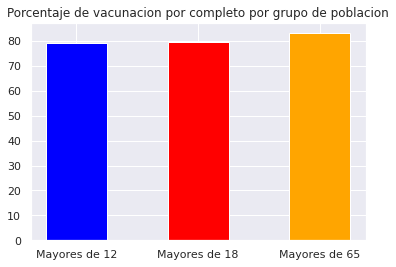

In [115]:
vx =["Mayores de 12",'Mayores de 18','Mayores de 65']
dy =[79.23,79.56,83.1]
colores = ['blue','red','orange']
pyplot.title("Porcentaje de vacunacion por completo por grupo de poblacion")
pyplot.bar(vx,height=dy,color=colores,width=0.5)

Gracias a los datos anteriores podemos saber que el 79.23% de los jovenes mayores de 12 años tiene las vacunas completas, el 79.56% de los jovenes adultos mayores de 18 años tienen las vacunas completas, y que el 83.1% de los adultos mayores a 65 años estan vacunados por completo. Gracias a estos resultados se crea una grfica de baras para visualizar estos resultados.